In [13]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

%matplotlib inline

In [2]:
df = pd.read_csv('../data/player_price.csv')

In [3]:
df['ds'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.loc[df["player_id"] == 2]
df.drop(["timestamp", "ps_price", "player_name", "player_id"], axis=1, inplace=True)
df.rename(columns={"xbox_price": "y"}, inplace=True)

# Quick prediction

In [4]:
m = Prophet()
m.fit(df);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=31)
future.tail()

,ds
299,2017-07-19
300,2017-07-20
301,2017-07-21
302,2017-07-22
303,2017-07-23


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
299,2017-07-19,372705.526344,237910.478850,501522.478191
300,2017-07-20,377327.793927,238322.930214,514805.453764
301,2017-07-21,379347.318233,234035.431163,512746.822528
302,2017-07-22,352648.298076,223580.326483,480062.498082
303,2017-07-23,335141.694341,206364.864439,469710.128457


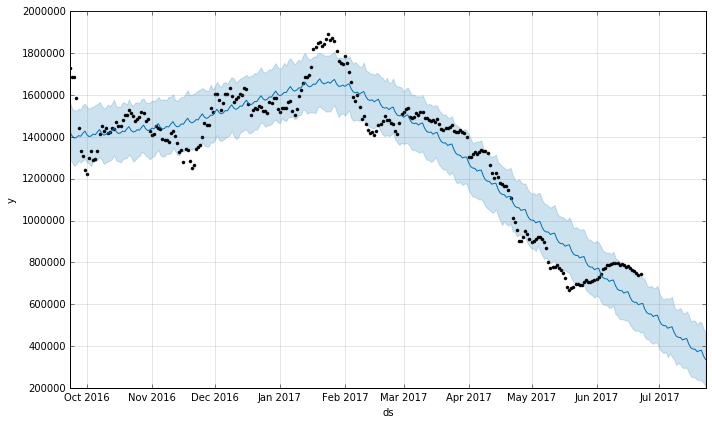

In [18]:
m.plot(forecast);

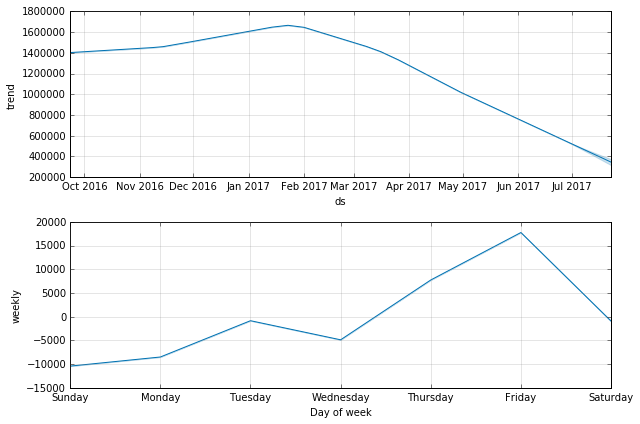

In [19]:
m.plot_components(forecast);

In [101]:
forecast.head()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,seasonal,yhat
0,2016-09-23,0.000000,1.398313e+06,18595.570277,18595.570277,1.398313e+06,1.398313e+06,1.300034e+06,1.552366e+06,18595.570277,18595.570277,18595.570277,18595.570277,1.416909e+06
1,2016-09-24,0.003676,1.399509e+06,-317.377231,-317.377231,1.399509e+06,1.399509e+06,1.272699e+06,1.525006e+06,-317.377231,-317.377231,-317.377231,-317.377231,1.399192e+06
2,2016-09-25,0.007353,1.400706e+06,-10079.931734,-10079.931734,1.400706e+06,1.400706e+06,1.264072e+06,1.507721e+06,-10079.931734,-10079.931734,-10079.931734,-10079.931734,1.390626e+06
3,2016-09-26,0.011029,1.401902e+06,-8479.338595,-8479.338595,1.401902e+06,1.401902e+06,1.272320e+06,1.509756e+06,-8479.338595,-8479.338595,-8479.338595,-8479.338595,1.393423e+06
4,2016-09-27,0.014706,1.403099e+06,-1212.573144,-1212.573144,1.403099e+06,1.403099e+06,1.275886e+06,1.518868e+06,-1212.573144,-1212.573144,-1212.573144,-1212.573144,1.401886e+06


# Other parameters

In [40]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(df);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


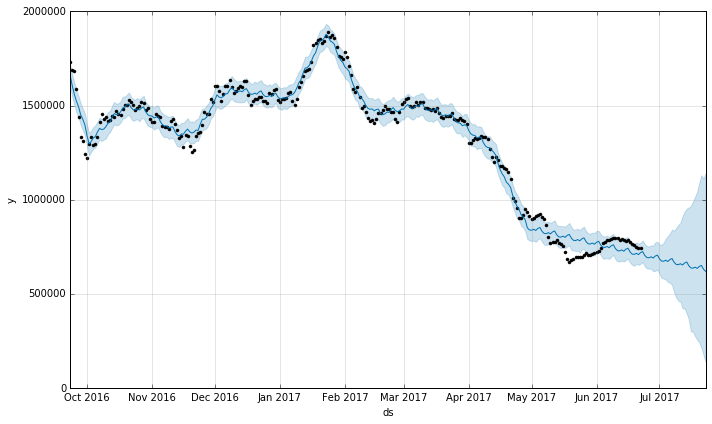

In [41]:
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

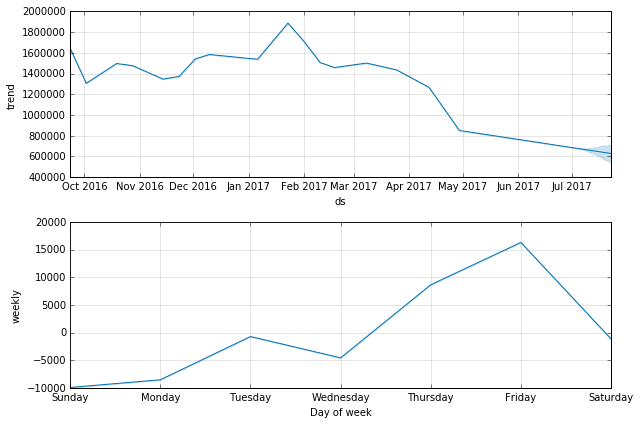

In [105]:
m.plot_components(forecast);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


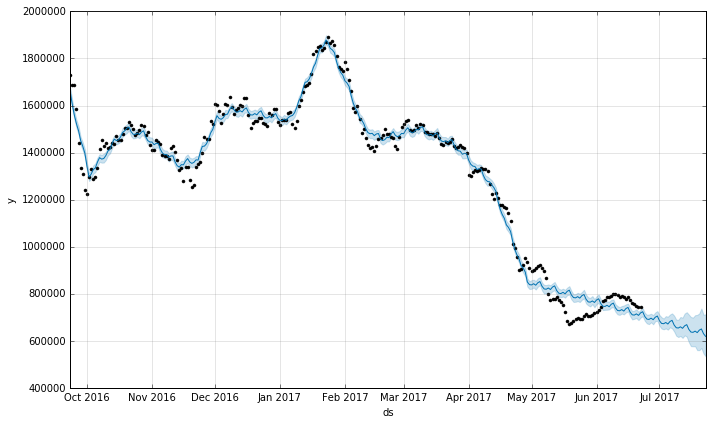

In [104]:
# changed interval_width
m = Prophet(changepoint_prior_scale=0.3, interval_width=0.3)
m.fit(df);
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


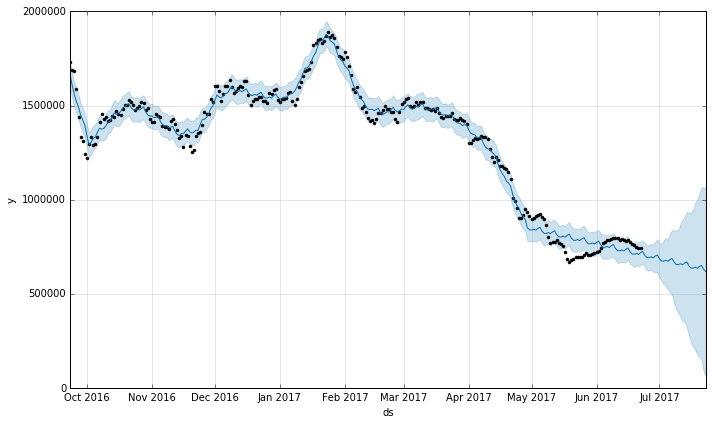

In [108]:
m = Prophet(changepoint_prior_scale=0.3, mcmc_samples=100)
m.fit(df);
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

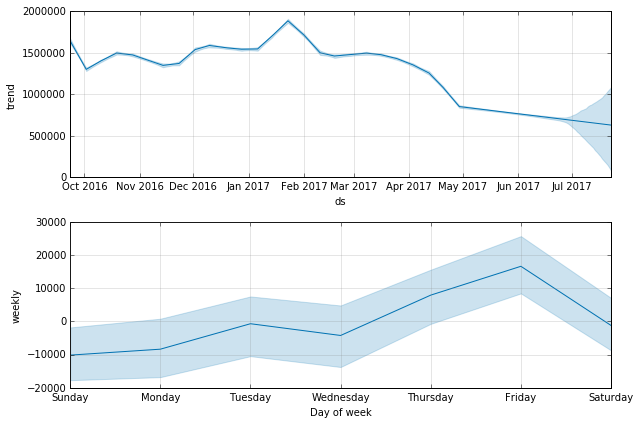

In [109]:
m.plot_components(forecast);

We can also add manually changepoint in `changepoints` parameter in `Prophet` object.

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


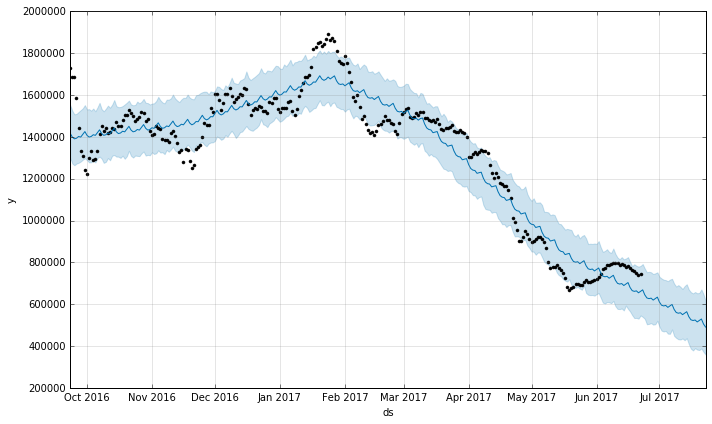

In [98]:
m = Prophet(changepoints=['2016-10-01', '2016-10-21', '2016-11-20',
                          '2016-12-15', '2017-01-08', '2017-01-24',
                          '2017-02-15', '2017-03-09', '2017-05-19'])
forecast = m.fit(df).predict(future)
m.plot(forecast);

In [127]:
m.make_all_seasonality_features(df).tail()

,zeros,weekly_delim_1,weekly_delim_2,weekly_delim_3,weekly_delim_4,weekly_delim_5,weekly_delim_6
268,0.0,4.338837e-01,-0.900969,-7.818315e-01,0.623490,9.749279e-01,-0.222521
269,0.0,-4.338837e-01,-0.900969,7.818315e-01,0.623490,-9.749279e-01,-0.222521
270,0.0,-9.749279e-01,-0.222521,4.338837e-01,-0.900969,7.818315e-01,0.623490
271,0.0,-7.818315e-01,0.623490,-9.749279e-01,-0.222521,-4.338837e-01,-0.900969
272,0.0,-8.838017e-13,1.000000,-1.767603e-12,1.000000,9.865737e-13,1.000000


In [126]:
m.make_all_seasonality_features(m.make_future_dataframe(5)).tail()

,zeros,weekly_delim_1,weekly_delim_2,weekly_delim_3,weekly_delim_4,weekly_delim_5,weekly_delim_6
273,0.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
274,0.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
275,0.0,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
276,0.0,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521
277,0.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490
